## Author : Shreyas Kumbhar

## GRIP @ The Sparks Foundation Jan-2023

### TASK 2 : Prediction using unsupervised ML

#### Dataset can be downloaded through the following link - https://bit.ly/3kXTdox

# Step1: Problem Definition

#### Problem Statement : 
* Predict the optimum number of clusters and represent it visually.

### Import required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# for data manipulation
import pandas as pd 
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Step2: Data Collection 
### Read the data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/shreyask98/The-Sparks-Foundation-Tasks/main/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape

(150, 6)

#### Observations:-

1.The first four columns are the features based on which the flowers are classified into classes

2.There are 150 data points in the dataset

3.There are five features for each data point

# Step 3 - Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Observations:-
1. All the datapoints are in float except Species

In [5]:
# dropping Id column

data.drop('Id', axis=1, inplace=True)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
print(data.isnull().sum())   # check for nulls & duplicates

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


#### Observations:-

1. There is no missing data in this datset

In [7]:
#count the number of classes in the dataset and further, the number of datapoints under each class
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Observation:- 
1. This is a balanced dataset
2. All three classes of Iris flowers have equal number of data points

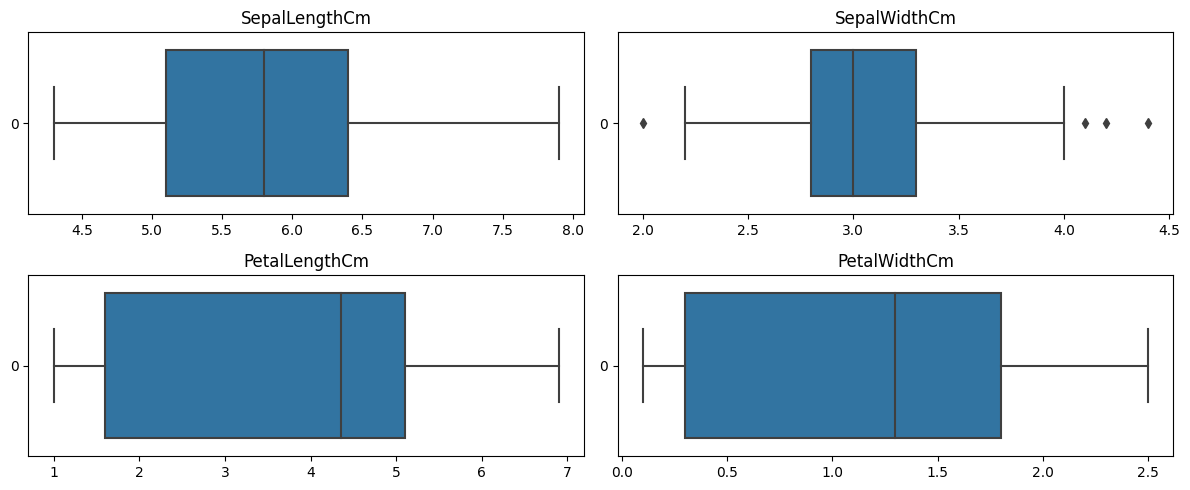

In [8]:
# checking the outliers for numric columns
col=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=[12,5])

for i,j in enumerate(col):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[j],orient='h')
    plt.xlabel("")
    plt.ylabel("")
    plt.title(j)
    plt.tight_layout()

In [9]:
## Treating outliers present in the SepalWidthCm column

q1,q3 = np.percentile(data['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
data['SepalWidthCm'] = data['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)
        

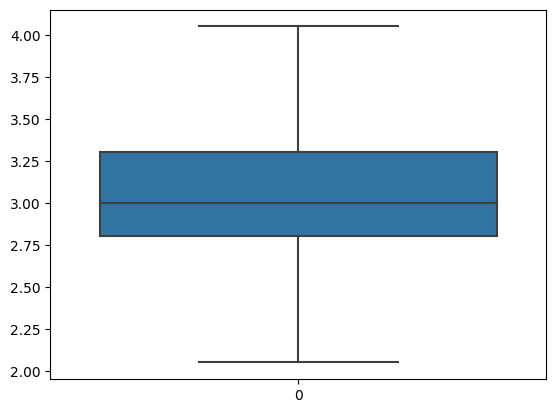

In [10]:
sns.boxplot(data['SepalWidthCm']);

### Understanding the data

In [11]:
## Target class
print(data.Species.value_counts())
# sns.countplot(data.Species);

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [12]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.050667,3.758667,1.198667
std,0.828066,0.423036,1.764420,0.763161
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


#### Observation:- 
This table helps us understand the range of values in each of the feature 

In [13]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

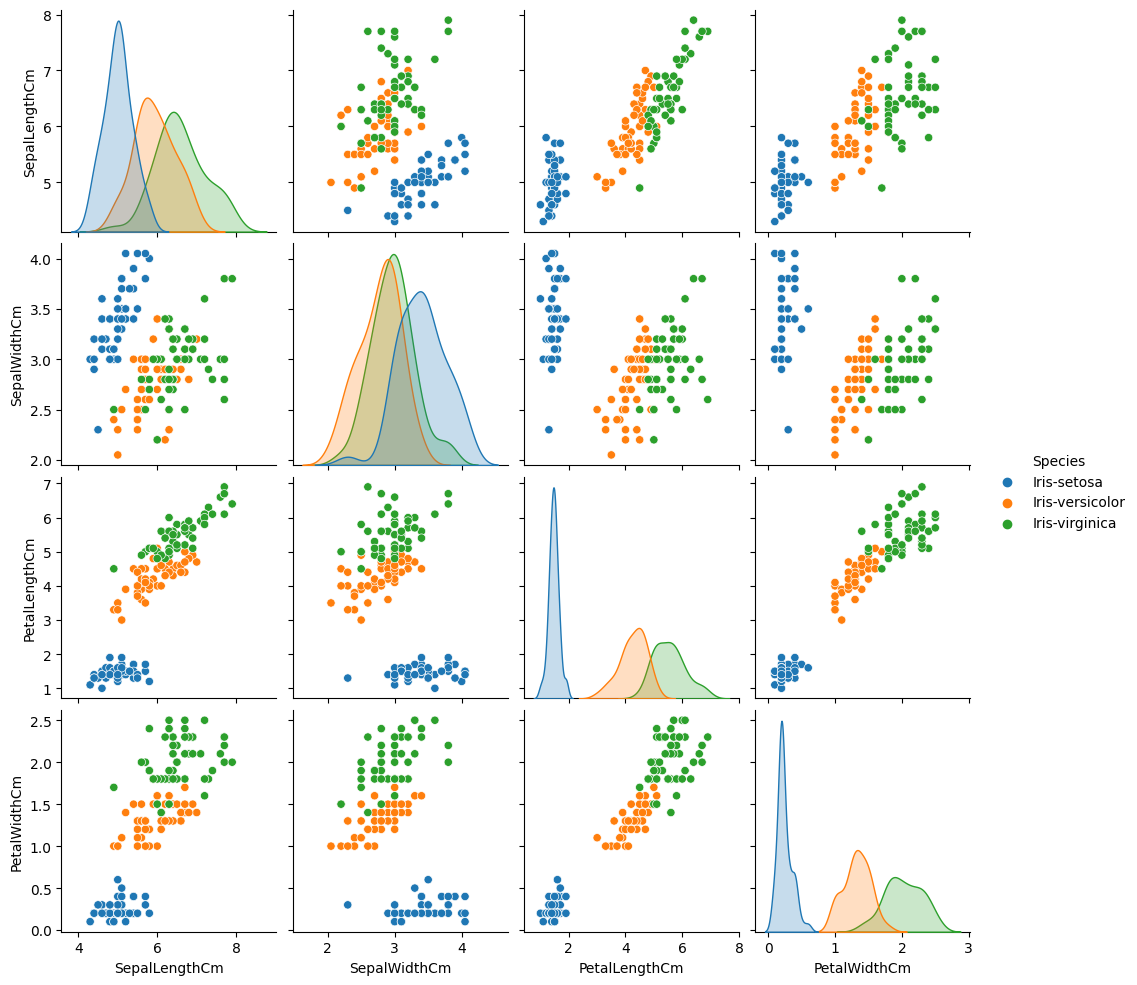

In [14]:
# Visualize the whole dataset
sns.pairplot(data, hue='Species')

#### Observation:- 

1. iris-setosa is well separated from the other two flowers.
2. iris virginica is the longest flower and iris setosa is the shortest.

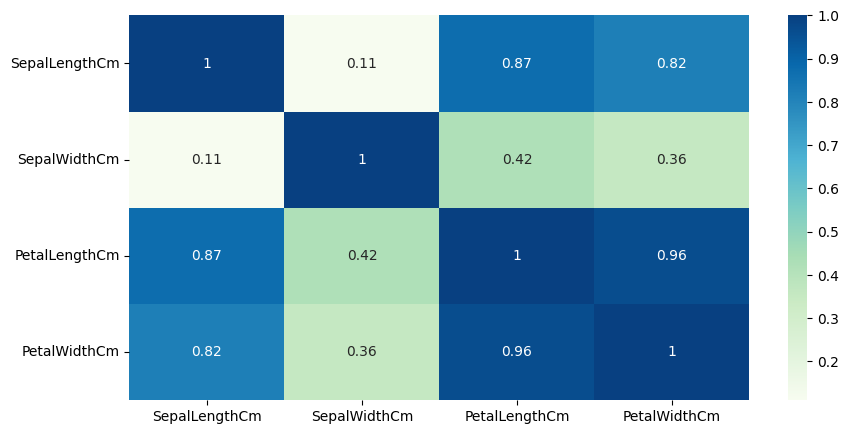

In [15]:
## Correlation Matrix
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()), cmap='GnBu', annot=True);

## Step 4 - Model Training

### K-means clustering

In [16]:
from sklearn.cluster import KMeans

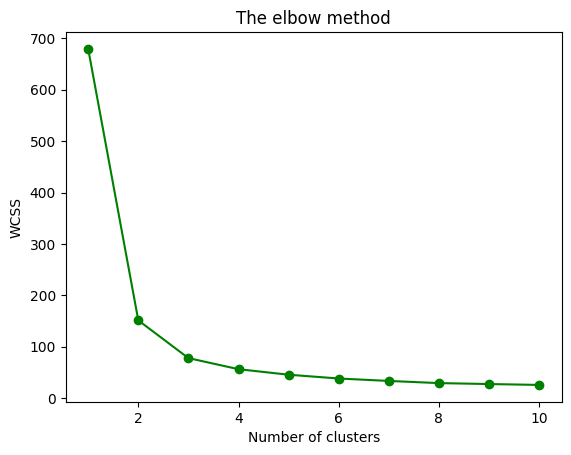

In [17]:
# Finding the optimum number of clusters for k-means classification using elbow plot

x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss,color='green', marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()



#### Observations:-

 The optimum number of clusters is 3


In [23]:
# Applying kmeans to the dataset with optimul value of k
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

 # model has been created

In [19]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.407     , 1.464     , 0.244     ],
       [5.9016129 , 2.74919355, 4.39354839, 1.43387097]])

In [20]:
# kmeans.labels_

np.unique(kmeans.labels_)  # show the labels

array([0, 1, 2])

# Step 5 - Visualizing the Model Cluster

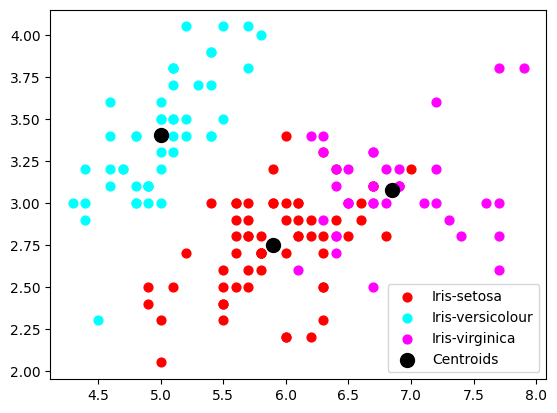

In [21]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],  s = 40, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],  s = 40, c = 'cyan', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],  s = 40, c = 'magenta', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()
plt.show()



In [22]:
centroids = pd.DataFrame(kmeans.cluster_centers_)

centroids

,0,1,2,3
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.407000,1.464000,0.244000
2,5.901613,2.749194,4.393548,1.433871


## Conclusion
### I was able to successfully carry-out prediction using Unsupervised Machine Learning task and was able to predict the optimum number of clusters and represented visually.

### Thank You !